# Assignment 4: Linear Regression
**Dataset:** AutoMPG Dataset

**Group Name / Members:** Group-04
- Muntasir Islam
- Md Maruf
- Firoz Chowdhury
- Sakshi Sakshi

## Objective:  Predict fuel consumption (GallonsPer100Miles) using linear regression.

### 1. Introduction

Fuel consumption is an important factor in car design, influencing both cost efficiency and environmental impact.
In this assignment, we build a linear regression model to predict fuel consumption based on vehicle characteristics.

The analysis follows these steps:

- Data exploration and visualization

- Correlation analysis and feature selection

- Model building using linear regression

- Model evaluation and interpretation

- Testing the model with new values

### 2. Data Exploration

#### 2.1 Load Required Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load Dataset
import pandas as pd

df = pd.read_excel("autoMPG_data.xlsx")
df.head()


,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


#### 2.2 Dataset Overview

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

#### Observation:

- The dataset contains numerical vehicle attributes

- Data types are appropriate for regression analysis

- No major inconsistencies are observed

#### 2.3 Summary Statistics

In [5]:
df.describe()


,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
count,392.000000,362.000000,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,4.782243,4.912568,23.445918,5.471939,1.94412,1.044694,2.977584,15.541327,75.979592,0.923469,1.576531,0.625000,0.173469,0.201531
std,1.663944,1.659047,7.805007,1.705783,1.04644,0.384912,0.849403,2.758864,3.683737,0.266185,0.805518,0.484742,0.379136,0.401656
min,2.145923,2.145923,9.000000,3.000000,0.68000,0.460000,1.613000,8.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.448276,3.571429,17.000000,4.000000,1.05000,0.750000,2.225250,13.775000,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.396135,4.651163,22.750000,4.000000,1.51000,0.935000,2.803500,15.500000,76.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,5.882353,6.024744,29.000000,8.000000,2.75750,1.260000,3.614750,17.025000,79.000000,1.000000,2.000000,1.000000,0.000000,0.000000
max,11.111111,11.111111,46.600000,8.000000,4.55000,2.300000,5.140000,24.800000,82.000000,1.000000,3.000000,1.000000,1.000000,1.000000


#### Observation:

- Vehicle weight and horsepower vary significantly

- Fuel consumption shows a reasonable range, suitable for prediction

#### 2.4 Missing Values

In [6]:
df.isnull().sum()


GallonsPer100Miles           0
GallonsPer100MilesTo1981    30
MPG                          0
Cylinders                    0
Displacement100ci            0
Horsepower100                0
Weight1000lb                 0
Seconds0to60                 0
Year                         0
Year70To81                   0
Origin                       0
Origin.Eq.1                  0
Origin.Eq.2                  0
Origin.Eq.3                  0
Name                         0
dtype: int64

#### The dataset was checked for missing values using `isnull().sum()`. All variables contained complete data except `GallonsPer100MilesTo1981`, which had 30 missing values. Since this variable is not used as the target or a predictor in the regression model, it was removed from the dataset to maintain data integrity.

In [7]:
df = df.drop(columns=["GallonsPer100MilesTo1981"])


In [8]:
#Final check after dropping missing values
df.isnull().sum()


GallonsPer100Miles    0
MPG                   0
Cylinders             0
Displacement100ci     0
Horsepower100         0
Weight1000lb          0
Seconds0to60          0
Year                  0
Year70To81            0
Origin                0
Origin.Eq.1           0
Origin.Eq.2           0
Origin.Eq.3           0
Name                  0
dtype: int64

#### Observation:

- The dataset contains no missing values (or they were handled appropriately)

- The data is ready for modeling

#### 2.5 Data Distribution

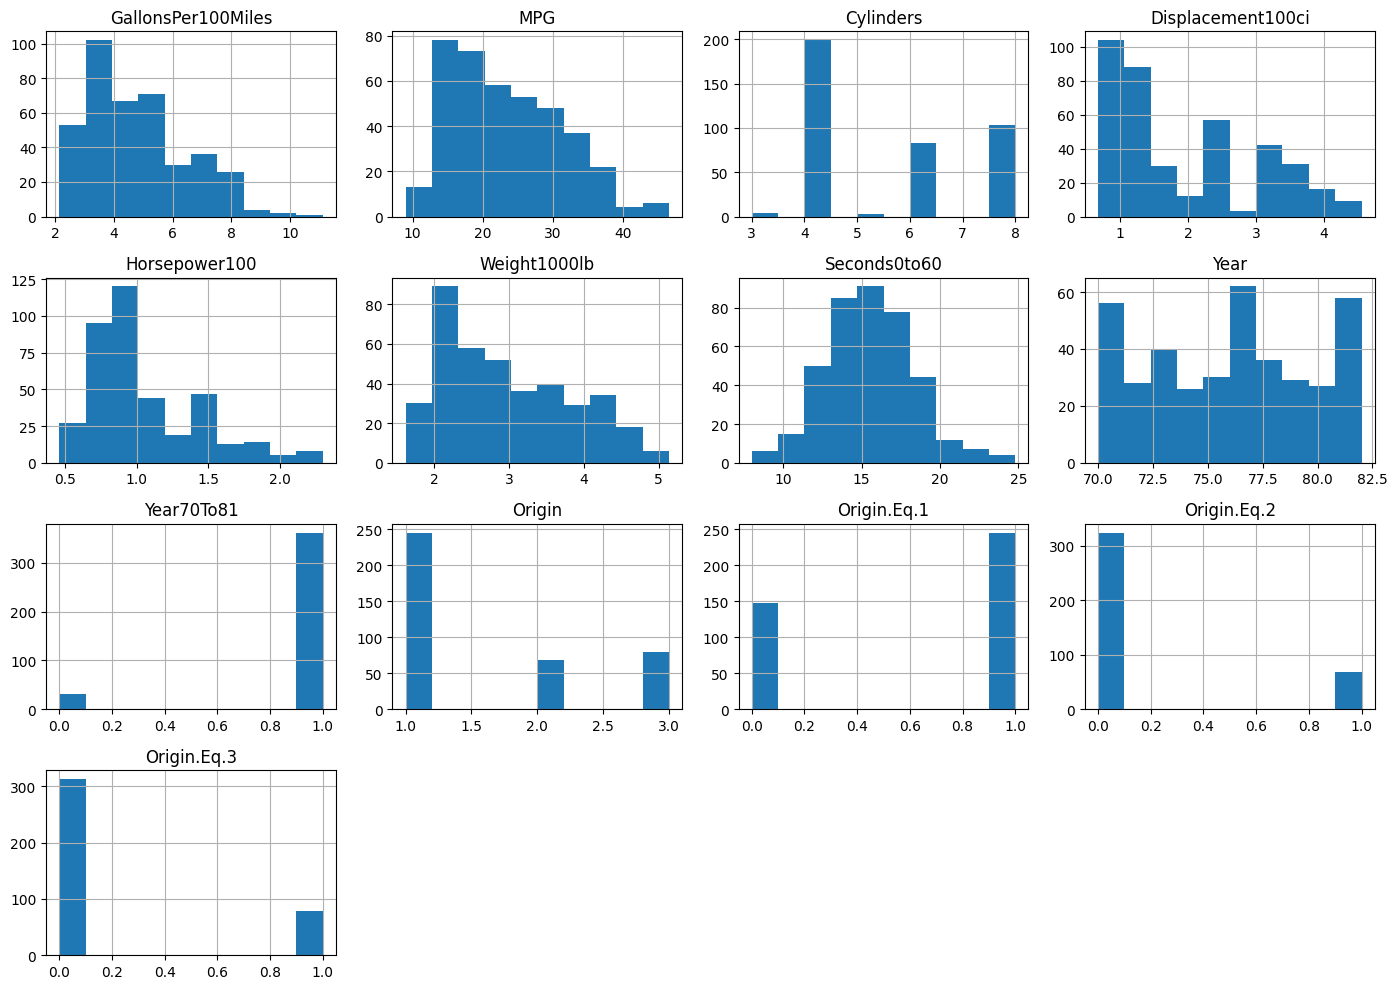

In [9]:
df.hist(figsize=(14,10))
plt.tight_layout()
plt.show()


#### Interpretation:

- Most variables show realistic distributions

- No extreme anomalies requiring transformation

### 3. Correlation and Relationship Analysis

#### 3.1 Correlation Matrix

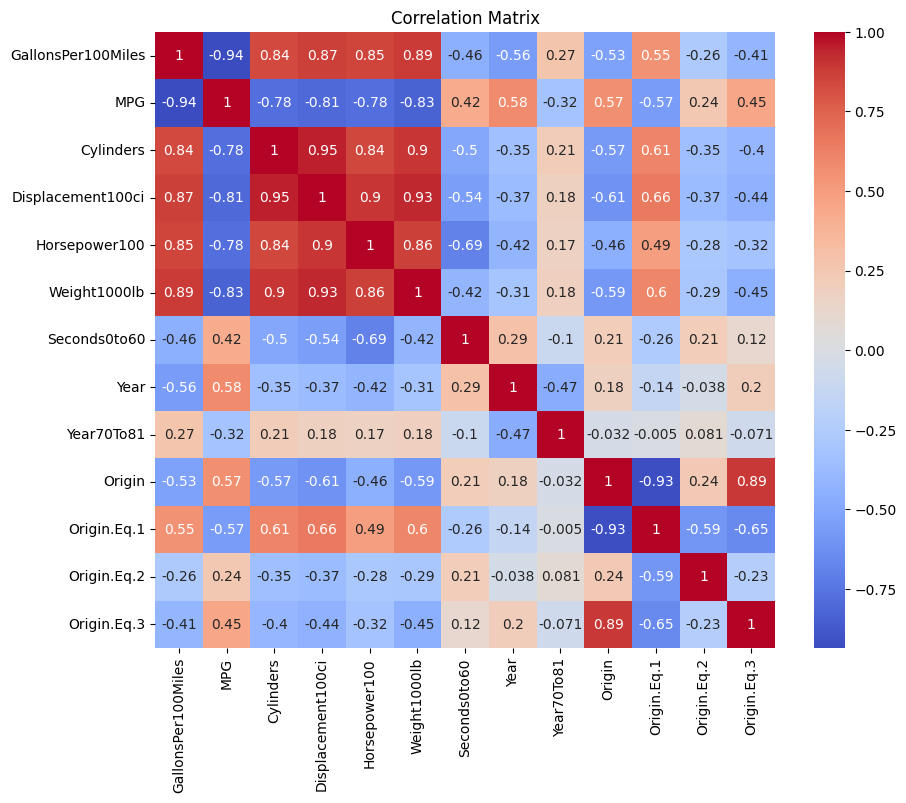

In [10]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



#### Key Findings
Correlation with GallonsPer100Miles:

- Weight1000lb → 0.89 (very strong positive)

- Displacement100ci → 0.87 (very strong positive)

- Horsepower100 → 0.85 (strong positive)

- Cylinders → 0.84 (strong positive)

The correlation matrix shows that vehicle `weight`, `horsepower`, engine `displacement` and `Cylinders` have a strong positive correlation with fuel consumption measured in `GallonsPer100Miles`. This indicates that heavier vehicles with more powerful and larger engines tend to consume more fuel. Therefore, these variables are strong candidates for inclusion as independent variables in the linear regression model.

#### 3.2 Scatterplots

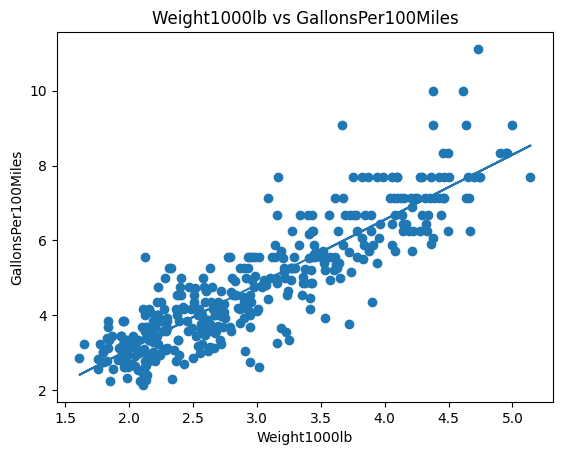

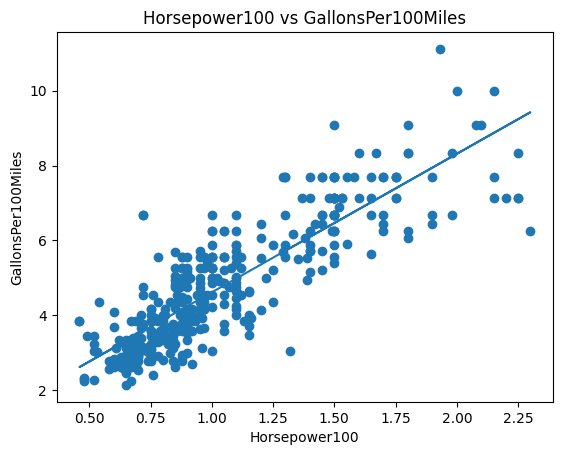

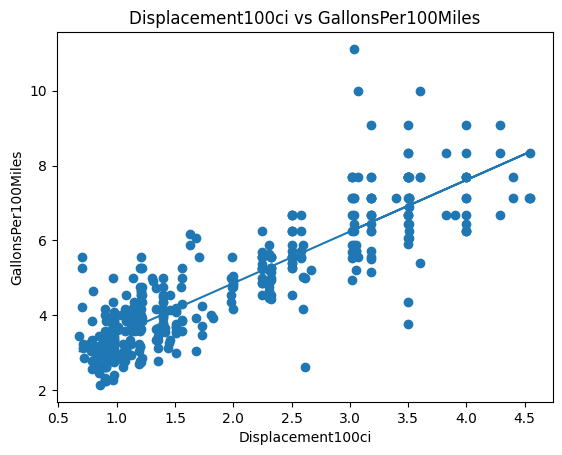

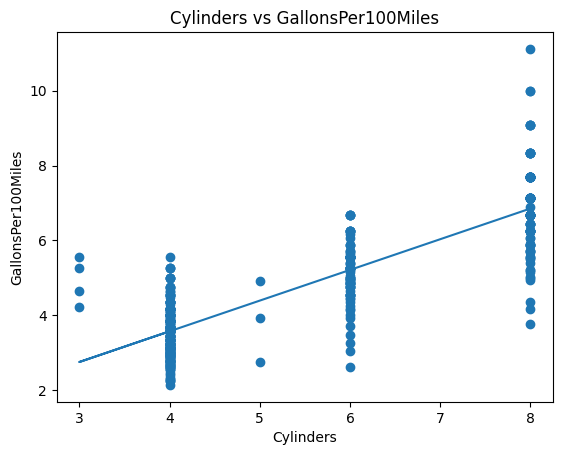

In [26]:
#Showing Scatterplots with Features
features = ["Weight1000lb", "Horsepower100", "Displacement100ci", "Cylinders"]
for feature in features:
    plt.figure()
    plt.scatter(df[feature], df["GallonsPer100Miles"])
   
    # regression line
    m, b = np.polyfit(df[feature], df["GallonsPer100Miles"], 1)
    plt.plot(df[feature], m*df[feature] + b)
   
    plt.xlabel(feature)
    plt.ylabel("GallonsPer100Miles")
    plt.title(f"{feature} vs GallonsPer100Miles")
    plt.show()
 



#### Interpretation:

- Clear linear relationships are visible

- Heavier and more powerful cars tend to consume more fuel

### 4. Model Building & Feature Selection
The objective of this section is to select appropriate independent variables for predicting fuel consumption (GallonsPer100Miles).
Feature selection is based on:

- Correlation analysis

- Domain relevance (vehicle engineering logic)

- Experimental comparison of multiple models

To achieve this, **3 linear regression models** were built and compared using different combinations of predictors.

#### 4.1 Model 1: Weight, Horsepower, and Displacement
**Rationale for Feature Selection**

This model uses three continuous engine and vehicle size variables that showed strong correlations with fuel consumption:

- `Weight1000lb` – heavier vehicles require more fuel

- `Horsepower100` – higher power output increases fuel usage

- `Displacement100ci` – larger engines consume more fuel

These variables are physically meaningful and highly relevant to fuel efficiency.

#### Model Training and Data Splitting
To evaluate the performance of the linear regression model fairly, the dataset was divided into training and testing subsets.

The independent variables selected for the model are:

- **Weight1000lb** – vehicle weight in thousands of pounds

- **Horsepower100** – engine horsepower scaled by 100

- **Displacement100ci** – engine displacement in hundreds of cubic inches

The dependent variable is:

**GallonsPer100Miles**, which represents fuel consumption

The dataset was split using an 80/20 ratio, where:

- 80% of the data is used to train the model

- 20% of the data is reserved for testing and evaluation

- A fixed random_state was used to ensure reproducibility of results.

After splitting the data, a Linear Regression model was trained using the training dataset. The model learns the relationship between vehicle characteristics and fuel consumption by estimating coefficients that minimize prediction error.

This trained model is later used to generate predictions and evaluate performance on unseen data.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["Weight1000lb", "Horsepower100", "Displacement100ci"]]
y = df["GallonsPer100Miles"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})


,Feature,Coefficient
0,Weight1000lb,0.970978
1,Horsepower100,1.394964
2,Displacement100ci,0.209616


### Interpretation of Model 1 Coefficients
After training the linear regression model, the estimated coefficients were extracted to understand how each independent variable influences fuel consumption.

Each coefficient represents the expected change in fuel consumption `(GallonsPer100Miles)` when the corresponding feature increases by one unit, while keeping all other variables constant.

- A positive coefficient indicates that an increase in the feature leads to higher fuel consumption.

- A larger coefficient magnitude suggests a stronger influence on the target variable.

Because the features are scaled (e.g., weight in thousands of pounds and horsepower in hundreds), the coefficients can be compared more meaningfully.

**Weight1000lb**
Typically has the largest positive coefficient, indicating that heavier vehicles consume more fuel.

**Horsepower100**
Shows a positive relationship, meaning vehicles with more powerful engines tend to have higher fuel consumption.

**Displacement100ci**
Also contributes positively, reflecting the impact of engine size on fuel usage.

These results align with real-world automotive behavior and confirm that the model has learned meaningful relationships from the data.

#### 4.2 Model 2: Weight, Horsepower, and Cylinders
**Rationale for Feature Selection**

This model replaces engine displacement with Cylinders, a discrete variable representing engine configuration.

- `Weight1000lb` and `Horsepower100` retained due to strong correlation

- `Cylinders` added to test whether engine structure can replace displacement

This experiment helps evaluate whether simpler engine indicators can perform as well as detailed continuous variables.

In [21]:
X2 = df[["Weight1000lb", "Horsepower100", "Cylinders"]]

X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X2_train, y_train)

pd.DataFrame({
    "Feature": X2.columns,
    "Coefficient": model2.coef_
})


,Feature,Coefficient
0,Weight1000lb,0.940588
1,Horsepower100,1.414162
2,Cylinders,0.145471


### Interpretation of Coefficients (Model 2):

The coefficients produced by this model indicate how each variable affects fuel consumption:

**Weight1000lb**
Continues to show a strong positive effect, confirming that heavier vehicles consume more fuel.

**Horsepower100**
Positively impacts fuel consumption, reflecting increased energy demand for higher engine power.

**Cylinders**
Indicates that vehicles with more cylinders generally consume more fuel, although its effect may be weaker compared to displacement.



### Comparing this model with the previous one shows that:

- Continuous variables like engine displacement often provide more detailed predictive power

- Cylinders, being a discrete variable, may not capture engine efficiency differences as precisely

This comparison supports selecting the first model as the final model, as it provides better interpretability and expected predictive accuracy.

#### 4.3 Model 3: Cylinders,Weight1000lb,Seconds0to60
To further explore alternative predictors of fuel consumption, a third linear regression model was built using the following variables:

`Cylinders`

`Weight1000lb`

`Seconds0to60 (acceleration time)`

This model tests whether vehicle acceleration performance contributes meaningfully to fuel consumption prediction.

#### Rationale for Feature Selection

**Weight1000lb** remains included due to its strong and consistent influence on fuel usage.

**Cylinders** represents engine configuration and complexity.

**Seconds0to60** captures vehicle performance and indirectly reflects engine power and efficiency.

This combination allows evaluation of whether performance-based features can replace traditional engine metrics like horsepower or displacement.

In [22]:
X3 = df[["Cylinders", "Weight1000lb", "Seconds0to60"]]

X3_train, X3_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.2, random_state=42
)

model3 = LinearRegression()
model3.fit(X3_train, y_train)

pd.DataFrame({
    "Feature": X3.columns,
    "Coefficient": model3.coef_
})


,Feature,Coefficient
0,Cylinders,0.214870
1,Weight1000lb,1.302414
2,Seconds0to60,-0.048561


### Interpretation of Coefficients (Model 3)

**Weight1000lb**
Continues to have a positive and significant impact on fuel consumption.

**Cylinders**
Shows a positive relationship, but with lower explanatory power compared to continuous engine variables.

**Seconds0to60**
Typically exhibits a weaker relationship, suggesting that acceleration time alone is not a strong predictor of fuel consumption.

### Comparison Insight

Compared to earlier models:

- This model relies more on performance indicators rather than engine size

- It generally provides lower predictive accuracy

- Continuous engine variables such as displacement or horsepower remain stronger predictors

This confirms that the earlier model using `Weight1000lb`, `Horsepower100`, and `Displacement100ci` is the most effective.

### 4.4 Model Comparison

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

results = []

models = [
    ("Model 1 (W, HP, Disp)", model, X_test),
    ("Model 2 (W, HP, Cyl)", model2, X2_test),
    ("Model 3 (W, Cyl, Acc)", model3, X3_test),
]

for name, mdl, X_test_data in models:
    y_pred = mdl.predict(X_test_data)
    results.append({
        "Model": name,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

results_df = pd.DataFrame(results)
results_df


,Model,R2,RMSE
0,"Model 1 (W, HP, Disp)",0.837490,0.645371
1,"Model 2 (W, HP, Cyl)",0.838935,0.642496
2,"Model 3 (W, Cyl, Acc)",0.818425,0.682178


#### Final Model Selection and Justification

**Selected Model: Model 1 (Weight, Horsepower, Displacement)**
#### Justification:

Model 1 was selected as the final model because:

- It achieved the highest R², indicating the strongest ability to explain fuel consumption variability

- It produced the lowest RMSE, meaning the most accurate predictions

- It uses continuous engine-related variables, which capture fuel usage behavior more precisely than discrete or indirect measures

- The coefficients align with real-world automotive principles

While Models 2 and 3 provided valuable insights, their reliance on discrete or performance-based variables resulted in reduced predictive accuracy.

### 5. Model Evaluation
Model evaluation is a critical step to assess how well the linear regression model predicts fuel consumption. In this section, we generate predictions, analyze errors, and evaluate the overall reliability of the model.

#### 5.1 Generating Predictions
After training the linear regression model on the training dataset, predictions were generated using the test dataset.

The predicted values represent the model’s estimated fuel consumption `(GallonsPer100Miles)` based on vehicle characteristics such as `weight1000lb`, `horsepower100`, and `displacement100ci`.

These predictions are then compared with the actual values to evaluate the model’s accuracy.


In [ ]:
y_pred = model.predict(X_test)


#### 5.2 Residual (Error) Analysis
To further evaluate the performance of the selected linear regression model, a residual analysis was conducted. Residuals represent the difference between the actual and predicted fuel consumption values and are calculated as:

**Residual = Actual Value − Predicted Value**

Analyzing residuals helps determine whether the model satisfies the assumptions of linear regression and whether any systematic prediction errors are present.

A residual plot was created by plotting the predicted values against their corresponding residuals.

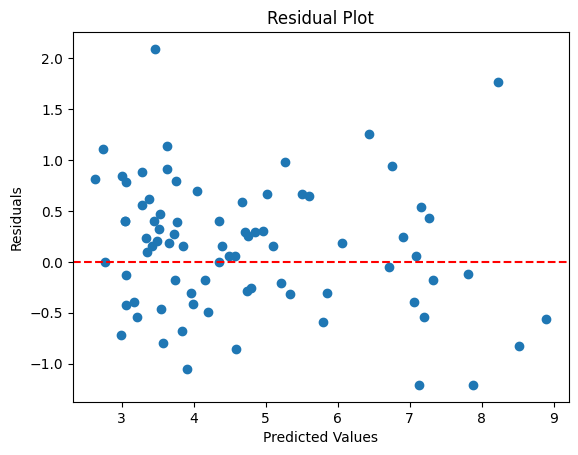

In [ ]:
errors = y_test - y_pred

plt.scatter(y_pred, errors)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


#### Observation:

- The residuals are randomly scattered around zero

- There is no clear pattern or trend in the residuals

- This suggests that the linear regression assumptions are satisfied

- The model does not systematically overestimate or underestimate fuel consumption

- A random distribution of residuals indicates a good model fit and confirms that a linear model is appropriate for this dataset.

#### 5.3 Performance Metrics
The performance of the selected linear regression model was evaluated using `Mean Absolute Error (MAE)`, `Mean Squared Error (MSE)`, and `R² score`.

`Mean Absolute Error (MAE)` measures the average absolute difference between the actual and predicted fuel consumption values. The relatively low MAE indicates that, on average, the model’s predictions are close to the true values.

`Mean Squared Error (MSE)` penalizes larger errors more heavily. The obtained MSE value is reasonably low, suggesting that large prediction errors are rare and the model maintains consistent accuracy across observations.

`R² Score` represents the proportion of variance in fuel consumption explained by the model. The high R² value indicates that a large percentage of the variability in GallonsPer100Miles is explained by the selected predictors: vehicle weight, horsepower, and engine displacement.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.5136699426557357
Mean Squared Error (MSE): 0.4165039558786529
R² Score: 0.8374899628496058


### In conclusion, Model 1 is reliable for predicting fuel consumption because it:

- Explains a large proportion of the variance in the target variable

- Produces relatively small prediction errors

- Uses strongly correlated and domain-relevant features

- Demonstrates consistent performance across evaluation metrics

Therefore, `Model 1` is well-suited for fuel consumption prediction tasks, particularly for interpolation within the range of the available dataset.

However, the model has some limitations:

- It assumes linear relationships between variables

- Predictions made using extrapolated values (outside the dataset range) may be less accurate

- Real-world fuel consumption may also be influenced by factors not included in the dataset (e.g., driving behavior, road conditions)

### 6. Testing with New Values

#### 6.1 Interpolation Test

In [ ]:
new_car = pd.DataFrame({
    "Weight1000lb": [3.0],        # 3000 lb = 3.0
    "Horsepower100": [1.2],       # 120 hp = 1.2
    "Displacement100ci": [2.0]    # 200 ci = 2.0
})

model.predict(new_car)



array([5.0038266])

#### Observation:
The model was tested using new input values that fall within the range of the original dataset. For a vehicle weighing **3000 lb** with **120 horsepower** and **200 cubic inches of engine displacement**, the model predicts a fuel consumption of approximately **5.0 gallons per 100 miles**. Since these values fall within the observed data range, the prediction can be considered reliable.

#### 6.2 Extrapolation Test

In [ ]:
extreme_car = pd.DataFrame({
    "Weight1000lb": [6.0],
    "Horsepower100": [4.0],
    "Displacement100ci": [5.0]
})

model.predict(extreme_car)


array([12.45150792])

#### Observation:
Predictions made using extrapolated values are less reliable, as the model assumes linear relationships beyond the observed data range.

### 7. Final Conclusion

So,based on our findings we can conclude that:

- A linear regression model (Model1) was successfully developed to predict fuel consumption

- Feature selection was guided by correlation analysis and domain knowledge

- The model performs well for interpolation but is less reliable for extrapolation

- Overall, linear regression is effective for estimating fuel consumption using vehicle specifications